In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
df=pd.read_csv('athlete_events.csv')
df=df.rename(columns={'Sex':'Gender'})
print(df.columns)

df['Gold']=df['Medal'].apply(lambda x: 1 if x=='Gold' else 0)
df['Silver']=df['Medal'].apply(lambda x: 1 if x=='Silver' else 0)
df['Bronze']=df['Medal'].apply(lambda x: 1 if x=='Bronze' else 0)

#kilogram to lbs conversion
df['Weight']=df['Weight']*2.20462
#centimeter to inches conversion
df['Height']=df['Height']*0.393701

df['BMI']=df['Weight']*703/df['Height']**2

df['IsOverWeight']=df['BMI'].apply(lambda x:  1 if (x>=25) and (x<=29.9)  else 0 )
df['IsNormalWeight']=df['BMI'].apply(lambda x:  1 if (x>=18.5) and (x<=24.9)  else 0 )
df['IsUnderWeight']=df['BMI'].apply(lambda x:  1 if (x<18.5) else 0 )

df['IsTallHeight']=df['Height'].apply(lambda x:  1 if (x>69)  else 0 )
df['IsNormalHeight']=df['Height'].apply(lambda x:  1 if (x>=64) and (x<=69)  else 0 )
df['IsShortHeight']=df['Height'].apply(lambda x:  1 if (x<64)  else 0 )

#print(df[['BMI','Weight','IsOverWeight','IsNormalWeight','IsUnderWeight']])
#print(df[['Height','IsTallHeight','IsNormalHeight','IsShortHeight']])

df['BMI_class']=df['BMI'].apply(lambda x: 'Over weight'     if (x>=25) and (x<=29.9) else 'Normal' if (x>=18.5) and (x<=24.9)  else 'Under Weight')
df['BMI_color']=df['BMI'].apply(lambda x: 'yellow'     if (x>=25) and (x<=29.9) else 'green' if (x>=18.5) and (x<=24.9)  else 'purple')



Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [3]:
print(df['Sport'].unique())
print(df['Year'].unique())
#buffer=""
#for team in df['Team'].unique():
#    buffer=buffer + team + " "
#print(buffer)
#print(df['Event'].unique())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964

In [4]:
filter = (df['Sport']=='Taekwondo') & (df['Year'] > 1980)
#filter =(df['Sport']=='Boxing') 
grouped=df[filter].groupby(['Sport','Team','Year'])

#print(grouped.head(100))

#for group_name,group in grouped:
#    print(group_name)
#    print(group['Event'].count())
    
fp=df[filter].pivot_table(index=['NOC','Year'],columns='Medal', values=['Name'],aggfunc='count').fillna(0)    
fp['Totals'] = fp.sum(axis='columns')
fp = fp.sort_values(by='Totals',ascending=False)
print(fp)


           Name             Totals
Medal    Bronze Gold Silver       
NOC Year                          
KOR 2016    3.0  2.0    0.0    5.0
    2008    0.0  4.0    0.0    4.0
    2004    2.0  2.0    0.0    4.0
    2000    0.0  3.0    1.0    4.0
USA 2008    2.0  0.0    1.0    3.0
...         ...  ...    ...    ...
GER 2000    0.0  0.0    1.0    1.0
GBR 2008    1.0  0.0    0.0    1.0
GAB 2012    0.0  0.0    1.0    1.0
FRA 2016    0.0  0.0    1.0    1.0
VIE 2000    0.0  0.0    1.0    1.0

[94 rows x 4 columns]


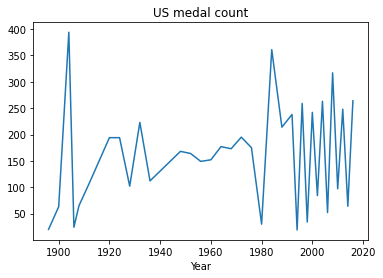

In [5]:
USA_medals_per_year = df.loc[df.NOC == 'USA'].groupby('Year')['Medal'].count()

plt.title("US medal count")
USA_medals_per_year.plot()
plt.show()


In [6]:
# Select the 'NOC' column of medals: country_names
filter=df['Year']>2000
country_names = df[filter]['NOC']
# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4243
RUS    3303
GER    3248
CAN    2786
CHN    2716
ITA    2637
FRA    2579
JPN    2423
AUS    2422
GBR    2222
UKR    1676
KOR    1634
ESP    1598
BRA    1591
POL    1485
Name: NOC, dtype: int64


Gender
F    4650
M    5484
Name: Medal, dtype: int64


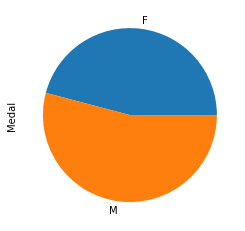

In [7]:
medals_by_gender=df[filter].groupby('Gender')
medals_count_by_gender=medals_by_gender['Medal'].count()
print(medals_count_by_gender)

medals_count_by_gender.plot.pie(figsize=(4,4))
plt.show()

In [19]:
grouped=df[filter].groupby('NOC', as_index=False)
Nsport=grouped['Sport'].nunique().rename(columns={'Sport':'SportCount'})
Nsport=Nsport.set_index('NOC')

country_grouped=df[filter].groupby('NOC')
Nsport2=country_grouped['Sport'].unique()
Nsport3=country_grouped['Gold'].sum()
Nsport4=country_grouped['Silver'].sum()
Nsport5=country_grouped['Bronze'].sum()

#print(Nsport2)


df2=pd.concat([Nsport,Nsport2,Nsport3,Nsport4,Nsport5],join='inner',axis=1).reindex(Nsport.index)
df2=df2.sort_values(by=["SportCount"],ascending=False)


#print(df2.columns)
for key,item in df2.head(5).iterrows():
    print(key,item['Sport'])



USA ['Wrestling' 'Figure Skating' 'Athletics' 'Rowing' 'Swimming' 'Football'
 'Snowboarding' 'Ski Jumping' 'Boxing' 'Short Track Speed Skating'
 'Ice Hockey' 'Water Polo' 'Baseball' 'Volleyball' 'Basketball' 'Shooting'
 'Skeleton' 'Gymnastics' 'Badminton' 'Freestyle Skiing' 'Biathlon'
 'Tennis' 'Rugby Sevens' 'Cycling' 'Curling' 'Sailing'
 'Cross Country Skiing' 'Speed Skating' 'Luge' 'Bobsleigh' 'Triathlon'
 'Beach Volleyball' 'Judo' 'Diving' 'Modern Pentathlon' 'Alpine Skiing'
 'Canoeing' 'Nordic Combined' 'Fencing' 'Weightlifting' 'Equestrianism'
 'Trampolining' 'Archery' 'Table Tennis' 'Golf' 'Taekwondo']
GER ['Athletics' 'Ice Hockey' 'Nordic Combined' 'Diving' 'Rowing' 'Bobsleigh'
 'Equestrianism' 'Canoeing' 'Luge' 'Gymnastics' 'Volleyball'
 'Cross Country Skiing' 'Hockey' 'Curling' 'Fencing' 'Cycling' 'Football'
 'Short Track Speed Skating' 'Sailing' 'Snowboarding' 'Speed Skating'
 'Handball' 'Judo' 'Figure Skating' 'Wrestling' 'Swimming' 'Shooting'
 'Biathlon' 'Freestyle Skiing'

<AxesSubplot:ylabel='NOC'>

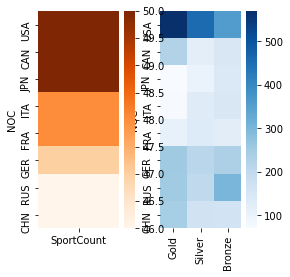

In [9]:
fig,ax =plt.subplots(1,2,figsize=(4,4))    
X=df2[['SportCount']].head(8)
sns.heatmap(X
    ,cmap='Oranges',linecolor='black',linewidths=0, ax=ax[0])    

X=df2[['Gold','Silver','Bronze']].head(8)
sns.heatmap(X
    ,cmap='Blues',linecolor='black',linewidths=0, ax=ax[1])    


In [10]:
grouped=df[filter].groupby(['NOC','Event'])['Gold','Silver','Bronze'].sum()
print(grouped)

                                                   Gold  Silver  Bronze
NOC Event                                                              
AFG Athletics Men's 100 metres                        0       0       0
    Athletics Women's 100 metres                      0       0       0
    Boxing Men's Flyweight                            0       0       0
    Boxing Men's Welterweight                         0       0       0
    Judo Men's Half-Heavyweight                       0       0       0
...                                                 ...     ...     ...
ZIM Swimming Women's 200 metres Individual Medley     0       1       1
    Swimming Women's 400 metres Individual Medley     0       1       0
    Tennis Men's Doubles                              0       0       0
    Tennis Women's Singles                            0       0       0
    Triathlon Men's Olympic Distance                  0       0       0

[15637 rows x 3 columns]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [20]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = df.pivot_table(index='Year',columns='NOC',values='Name',aggfunc='count')
medals_won_by_country['Totals'] = medals_won_by_country.sum(axis='columns')
medals_won_by_country = medals_won_by_country.sort_values(by='Totals',ascending=False)

print(medals_won_by_country.head(10))
#print(medals_won_by_country.idxmax(axis='columns').value_counts())
#print(medals_won_by_country.index)
# Slice medals_won_by_country: cold_war_usa_urs_medals
#twentith_century_medals = medals_won_by_country.loc[2000,: ]

#print(twenith_century_medals)
#most_medals = twentith_century_medals.idxmax()

# Print most_medals.value_counts()
#print(most_medals)

NOC   AFG   AHO   ALB   ALG   AND   ANG   ANT  ANZ    ARG   ARM  ...   VIN  \
Year                                                             ...         
1992  NaN   6.0   9.0  44.0  22.0  33.0  18.0  NaN  157.0   NaN  ...   8.0   
1988  5.0   7.0   NaN  45.0  13.0  33.0  25.0  NaN  179.0   NaN  ...   6.0   
2000  NaN   8.0   5.0  51.0   5.0  30.0   4.0  NaN  165.0  26.0  ...   4.0   
1996  2.0   7.0   9.0  47.0   8.0  30.0  19.0  NaN  221.0  38.0  ...  12.0   
2016  3.0   NaN   6.0  74.0   4.0  26.0   9.0  NaN  232.0  34.0  ...   4.0   
2008  4.0   4.0  12.0  57.0   5.0  33.0   5.0  NaN  145.0  26.0  ...   2.0   
2004  5.0   3.0   7.0  71.0   6.0  30.0   5.0  NaN  179.0  19.0  ...   3.0   
2012  6.0   NaN  10.0  39.0   6.0  35.0   4.0  NaN  148.0  31.0  ...   3.0   
1972  8.0   2.0   5.0   7.0   NaN   NaN   NaN  NaN  129.0   NaN  ...   NaN   
1984  NaN  13.0   NaN  33.0   8.0   NaN  27.0  NaN  152.0   NaN  ...   NaN   

NOC   VNM  WIF  YAR  YEM  YMD    YUG   ZAM   ZIM   Totals  
Yea

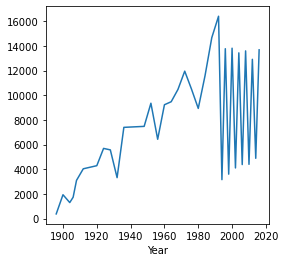

Number of Athletes competing every olympic


In [23]:
fig,ax=plt.subplots(figsize=(4,4))
grouped=df.groupby(['Year'])['Name'].count().plot(ax=ax)
plt.show()
print("Number of Athletes competing every olympic")

Medal     Bronze  Gold  Silver
Year NOC                      
2002 USA      15    11      58
2004 USA      71   117      75
2006 USA      32     9      11
2008 USA      80   127     110
2010 USA      22    12      63
2012 USA      46   145      57
2014 USA      24    10      30
2016 USA      71   139      54


<AxesSubplot:xlabel='Year'>

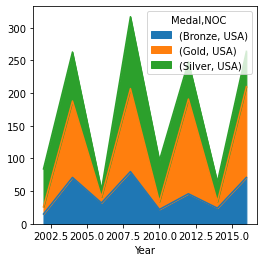

In [25]:
filter=(df['NOC']=='USA') & (df['Year']>2000)
grouped=df[filter].groupby(['Year','NOC','Medal'])['Name'].count().unstack()
print(grouped)

usa_medals_by_year = grouped.unstack(level='NOC')
fig,ax=plt.subplots(figsize=(4,4))
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot.area(ax=ax)

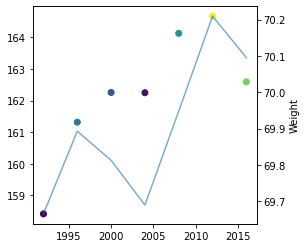

Usa athletes are getting taller and weight more


In [26]:
usa = df[(df['NOC']=='USA') &(df['Season']=='Summer') & (df['Year']>1990) ]
#print(usa)
grouped=usa.groupby('Year')[['Height','Weight']].mean()
fig,ax=plt.subplots(figsize=(4,4))
ax.scatter(grouped.index,'Weight',c='Height',data=grouped)
twin_ax=ax.twinx()

twin_ax.plot(grouped.index,'Height',data=grouped, alpha=.6)
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

print('Usa athletes are getting taller and weight more')


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '158.41258199817133'),
  Text(1, 0, '161.31553260053622'),
  Text(2, 0, '162.24844478561573'),
  Text(3, 0, '162.25596550724646'),
  Text(4, 0, '162.59226025069643'),
  Text(5, 0, '164.12754343915356'),
  Text(6, 0, '164.66815538461557')])

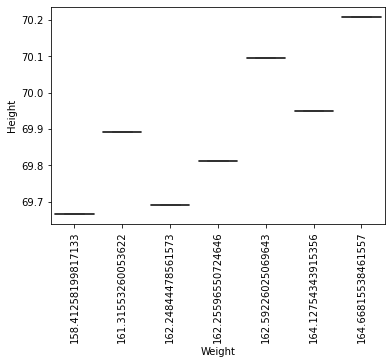

In [27]:
sns.boxplot(y='Height',x='Weight',data=grouped, palette="Blues")
plt.xticks(rotation=90)

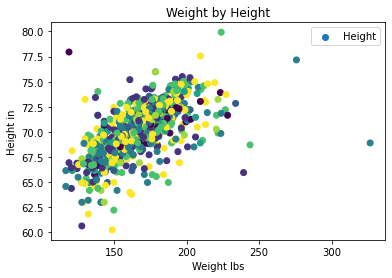

In [28]:
filter=(df['Year']>2000) & (df['Gender']=='M')
summary_df=pd.DataFrame(columns=['NOC','Year','Weight','Height'])
for grp_index, group in df[filter].groupby(['NOC','Year']):
    weightlbs=group['Weight'].mean()
    heightin=group['Height'].mean()
    index=len(summary_df)
    summary_df.loc[index]=[grp_index[0],grp_index[1],weightlbs,heightin]
    
plt.scatter(y='Height',x='Weight',data=summary_df,c='Year')
plt.xlabel("Weight lbs")
plt.ylabel("Height in")
plt.title("Weight by Height")
plt.legend()
plt.show()



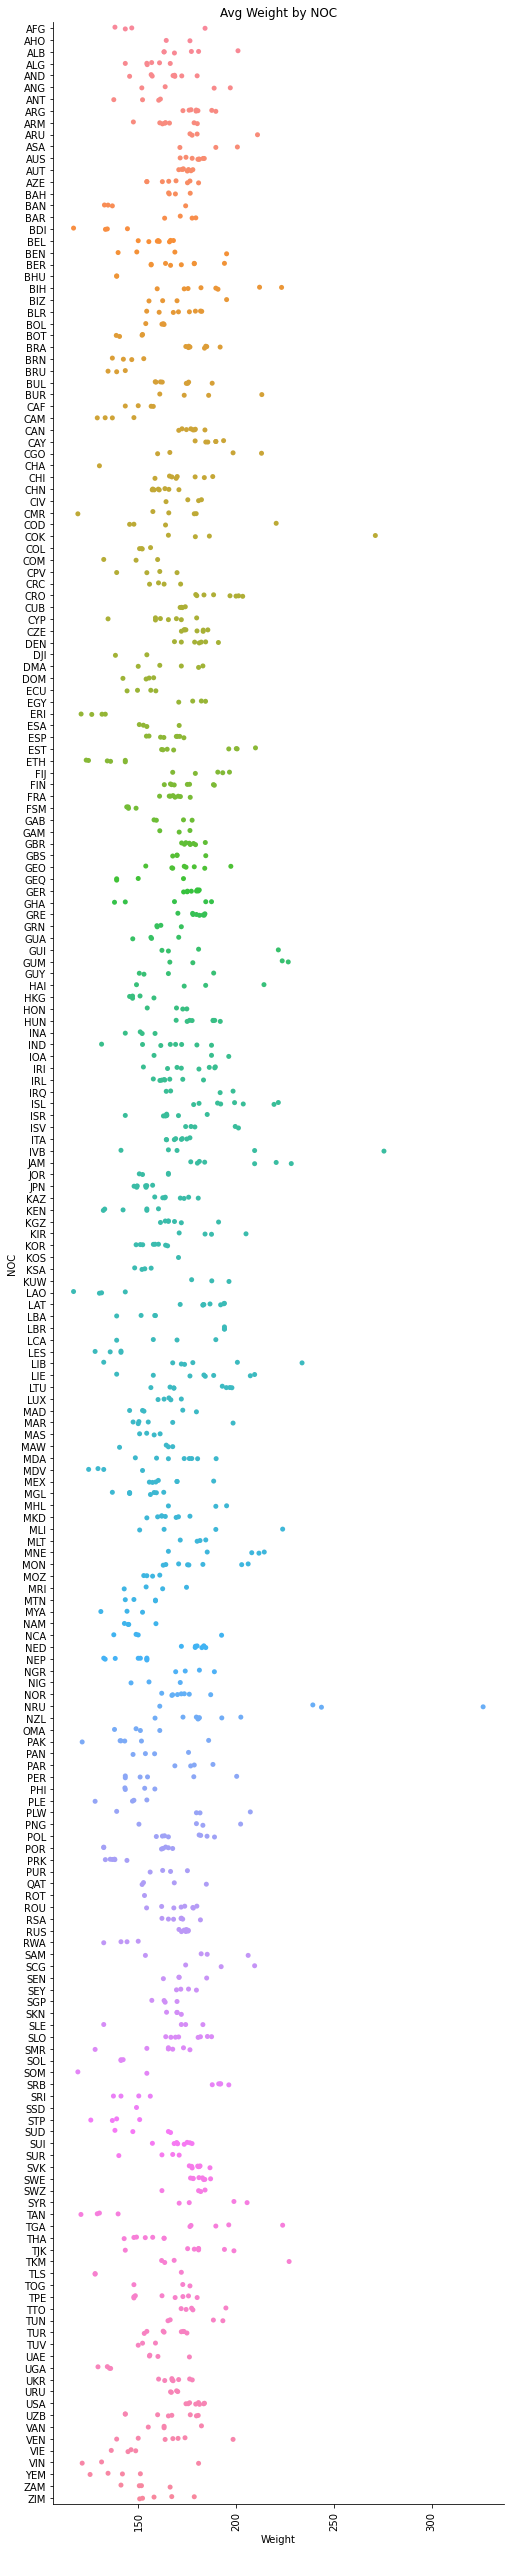

In [ ]:
sns.catplot(x='Weight',y='NOC' ,data=summary_df,height=35,aspect=.2)
plt.xticks(rotation=90)
plt.title('Avg Weight by NOC')
plt.show()

sns.catplot(x='Height',y='NOC' ,data=summary_df,height=35,aspect=.2)
plt.xticks(rotation=90)
plt.title('Avg Height by NOC')
plt.show()

In [ ]:
print("purple is excellent bmi, green is standard bmi, and yellow is over weight bmi")
xs=df['Weight']
ys=df['Height']
color_labels=df['BMI_color']

_=plt.scatter(xs,ys,c=color_labels)
plt.xlabel('Weight lbs')
plt.ylabel('Height in')
plt.show()

print("The olympic athlets are mostly standard bmi or excellent bmi")